In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML

pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)
pd.set_option("Display.width", None)

In [40]:
data = pd.read_csv("./Fifa 21/players_21.csv")

In [41]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

# EXPLORATORY DATA ANALYSIS

In [42]:
data.shape
# 18944 players, 106 attributes

(18944, 106)

In [43]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [44]:
skills = []
for i in data.columns:
    skills.append(i)
skills

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

In [45]:
# Finding null values
data.isnull().sum()


sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

## SELECTING PARTICULAR COLUMNS FOR ANALYSIS  

In [46]:
fill_values = data.loc[:,['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

for i in fill_values.columns:
    data[i].fillna(data[i].mean(), inplace=True)

In [47]:
 data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

## PLOTTING COUNT OF PLAYERS BASED ON THEIR HEIGHTS

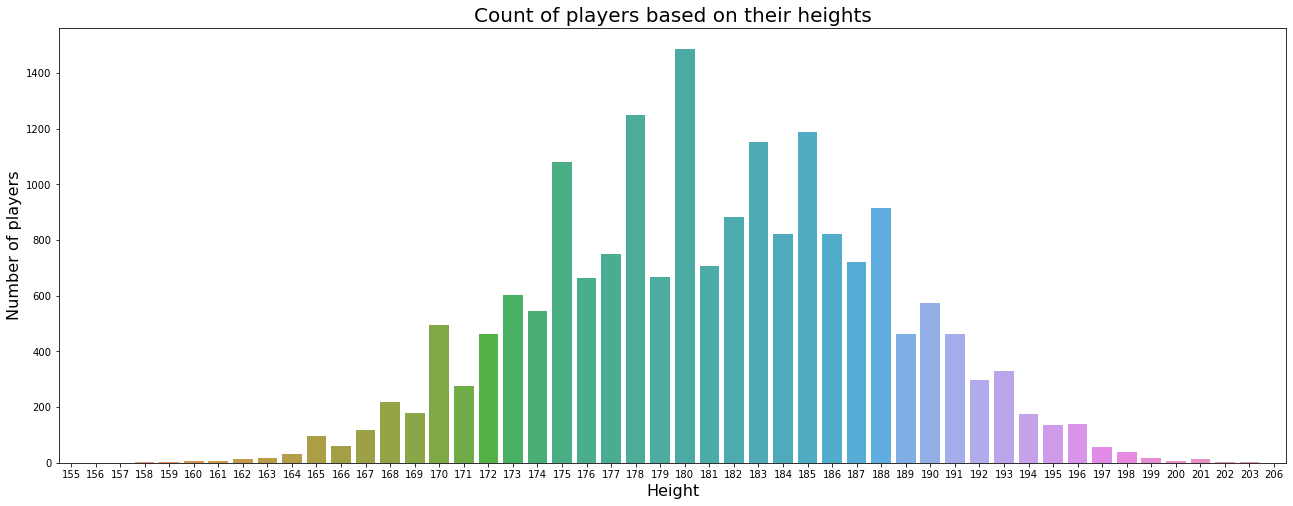

In [48]:
plt.figure(figsize=(22,8))
ax = sns.countplot(x="height_cm", data = data)
ax.set_title(label = "Count of players based on their heights", fontsize = 20)
ax.set_xlabel(xlabel = "Height", fontsize = 16)
ax.set_ylabel(ylabel = "Number of players", fontsize = 16)
plt.show()  

## HEIGHT VS DRIBBLING

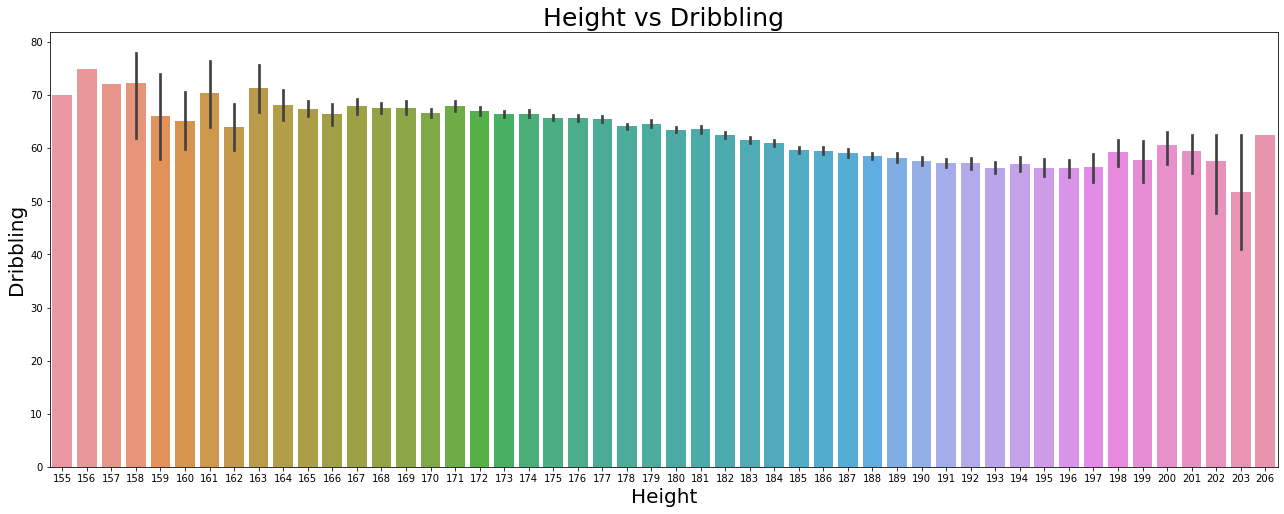

In [49]:
plt.figure(figsize=(22,8))
bp = sns.barplot(x="height_cm", y ="dribbling", data = data.sort_values("height_cm", inplace = False))
bp.set_xlabel(xlabel= "Height", fontsize =20)
bp.set_ylabel(ylabel="Dribbling", fontsize =20)
bp.set_title("Height vs Dribbling", fontsize =25)
plt.show()

## WEIGHT VS DRIBBLING

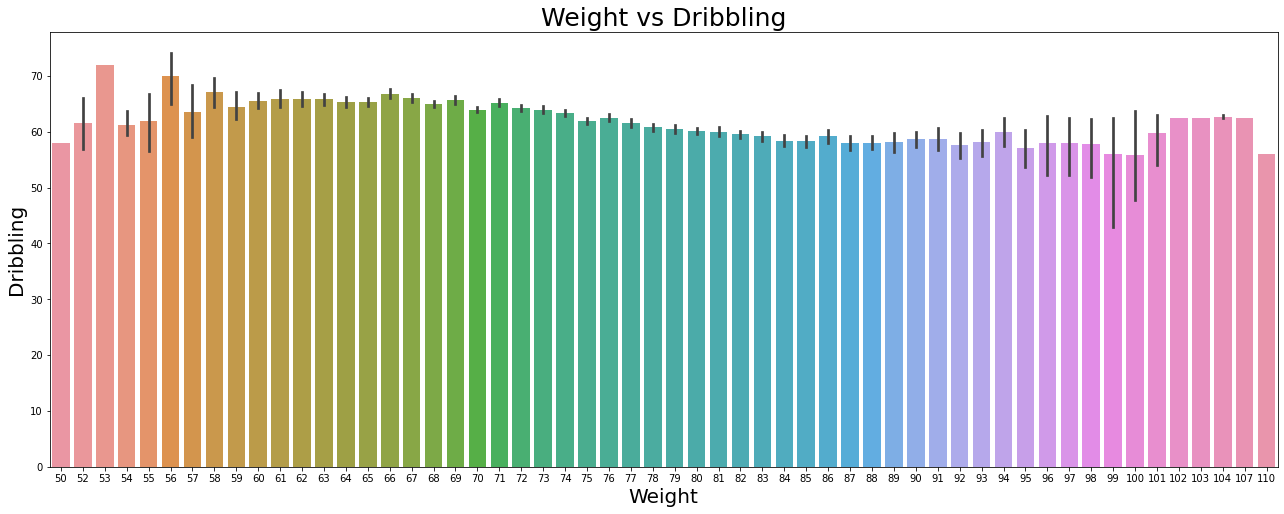

In [50]:
plt.figure(figsize=(22,8))
wd = sns.barplot(x="weight_kg", y="dribbling", data =data.sort_values("weight_kg", inplace =False))
wd.set_title("Weight vs Dribbling", fontsize = 25)
wd.set_xlabel(xlabel="Weight", fontsize=20)
wd.set_ylabel(ylabel="Dribbling", fontsize=20)
plt.show()

## MESSI VS RONALDO

In [51]:
 skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing', 
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [52]:
messi = data.loc[data['short_name']=='L. Messi']
messi = pd.DataFrame(messi, columns=skills)

ronaldo = data.loc[data['short_name']=='Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)

In [53]:
messi

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,91,80,91,94,95,86,68,72,69,94


In [54]:
ronaldo

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,87,91,87,95,71,94,95,84,78,93


21

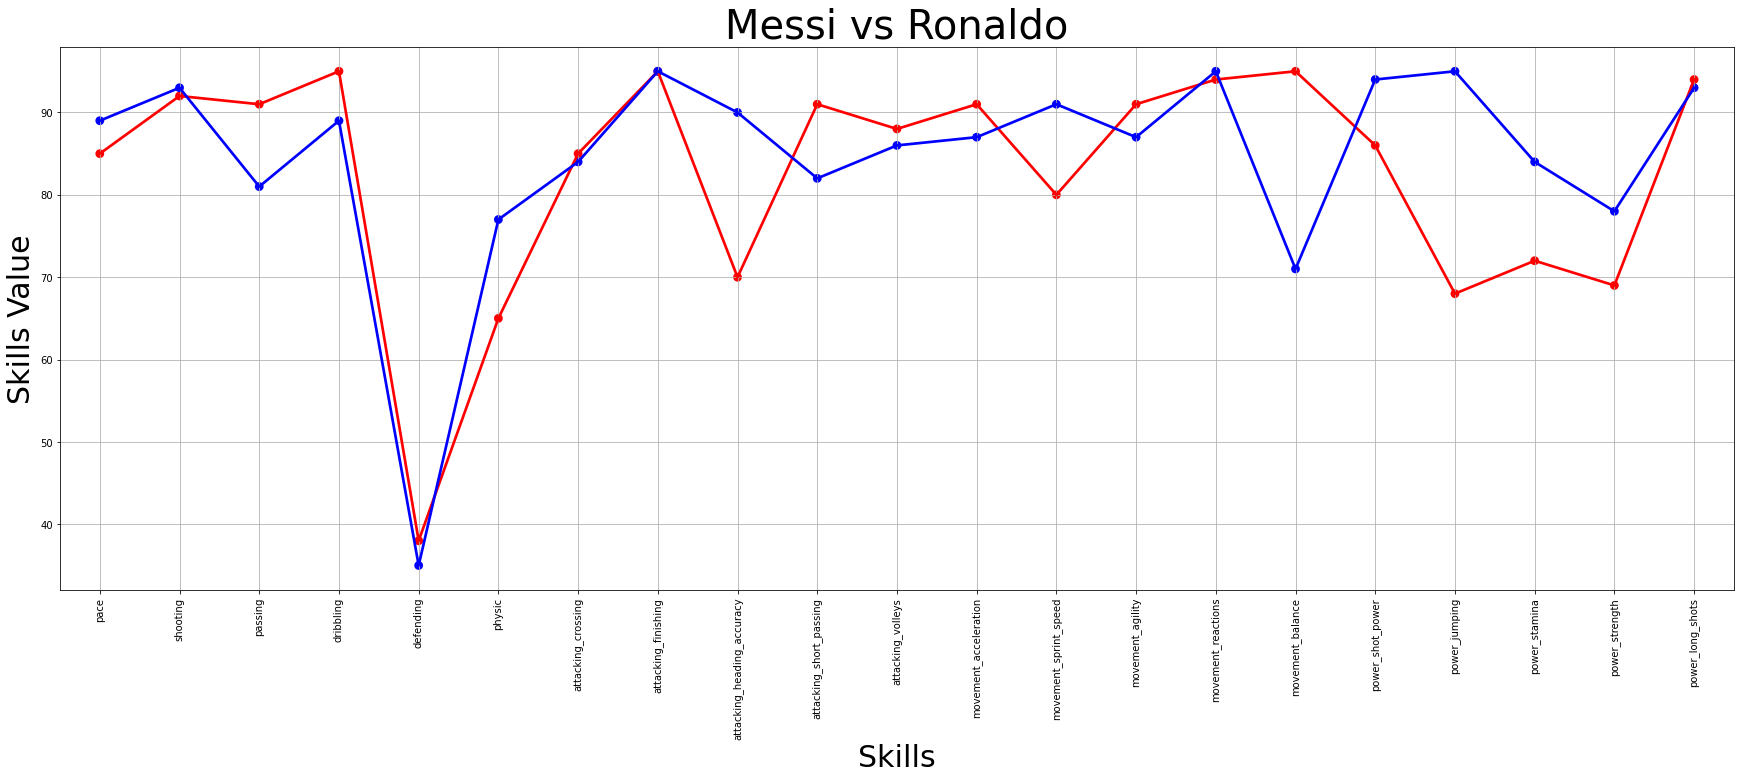

In [55]:
plt.figure(figsize=(30,10))
sns.pointplot(data = messi, color = 'red')
sns.pointplot(data = ronaldo, color = 'blue')
plt.title("Messi vs Ronaldo", fontsize =40)
plt.xticks(rotation =90)
plt.xlabel("Skills", fontsize =30)
plt.ylabel("Skills Value", fontsize =30)
plt.grid()

## TOP 10 PLAYERS BASED ON OVERALL SKILLS

In [56]:
top_players = data.sort_values('overall', ascending = False)[['short_name', 'overall']].head(10)

In [57]:
top_players

,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,R. Lewandowski,91
4,Neymar Jr,91
5,K. De Bruyne,91
9,Alisson,90
10,S. Mané,90
11,M. Salah,90
8,V. van Dijk,90


## TOP 5 NATIONS WITH OVERALL BEST PLAYERS

In [58]:
top_nations = data.groupby(['nationality'])['overall'].max().sort_values(ascending=False).head(5)

In [59]:
top_nations

nationality
Argentina    93
Portugal     92
Belgium      91
Brazil       91
Slovenia     91
Name: overall, dtype: int64

## TOP 5 CLUBS WITH OVERALL BEST PLAYERS

In [60]:
top_clubs = data.groupby(['club_name'])['overall'].max().sort_values(ascending=False).head(5)

In [61]:
top_clubs

club_name
FC Barcelona           93
Juventus               92
Paris Saint-Germain    91
Manchester City        91
Atlético Madrid        91
Name: overall, dtype: int64

## AGE DISTRIBUTION OF PLAYERS IN COUNTRIES

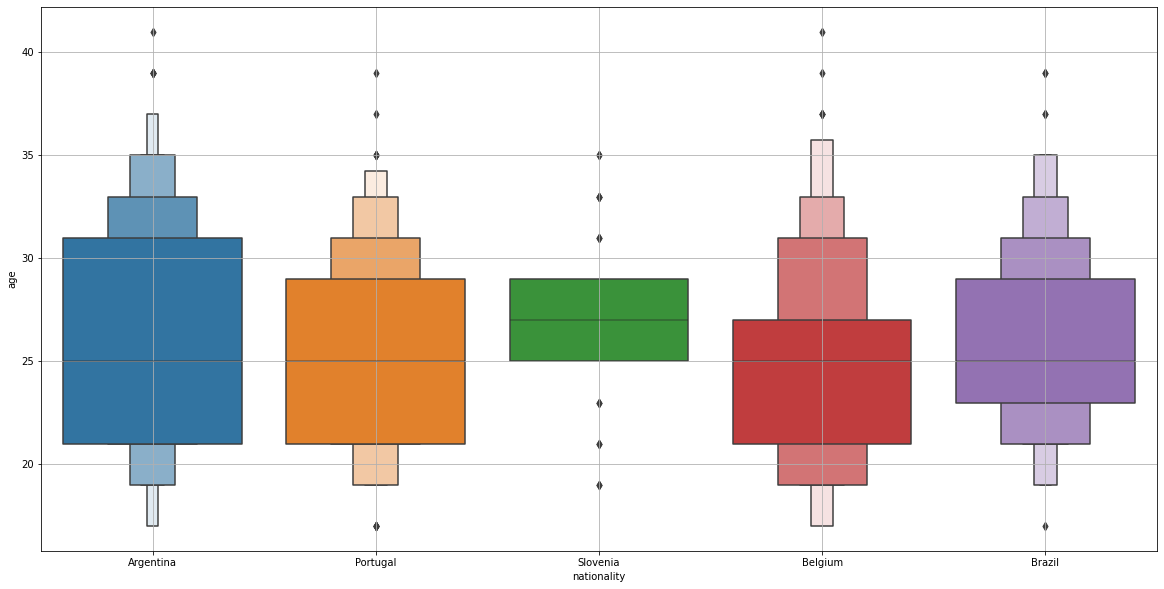

In [62]:
countries_names = ['Argentina', 'Portugal', 'Belgium', 'Brazil', 'Slovenia']

countries = data.loc[data['nationality'].isin(countries_names) & data['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.boxenplot(x = 'nationality', y = 'age', data = countries)
plt.grid()
plt.show()

## AGE DISTRIBUTION OF PLAYERS IN CLUB

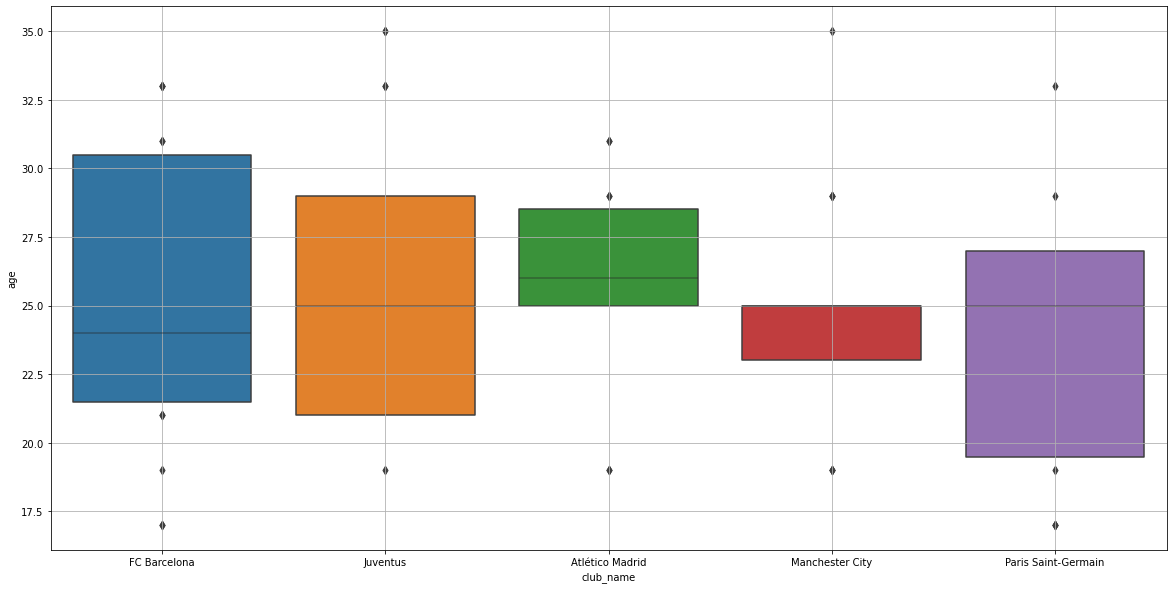

In [63]:
club_names = ['FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Manchester City', 'Atlético Madrid']

clubs = data.loc[data['club_name'].isin(club_names) & data['age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.boxenplot(x = 'club_name', y = 'age', data = clubs)
plt.grid()
plt.show()

## NATIONWISE PLAYER COUNTS AND AVERAGE POTENTIAL

In [64]:
best_avg_overall = data.groupby('nationality').apply(lambda x:np.average(x['overall'])).reset_index(name='Overall Ratings')

best_avg_player = data.groupby('nationality').apply(lambda x:x['overall'].count()).reset_index(name='Player Counts')

best_avg_count = pd.merge(best_avg_overall, best_avg_player, how='inner', left_on='nationality', right_on='nationality')

best_avg_top = best_avg_count[best_avg_count['Player Counts'] >= 200]

best_avg_top.sort_values(['Overall Ratings', 'Player Counts'], ascending = False)

,nationality,Overall Ratings,Player Counts
20,Brazil,70.961669,887
123,Portugal,69.804533,353
140,Spain,69.261194,1072
76,Italy,68.707838,421
6,Argentina,67.793803,936
14,Belgium,67.593960,298
107,Netherlands,67.458333,432
156,Uruguay,67.191977,349
54,France,67.175813,984
32,Colombia,66.659763,338


In [65]:
best_avg_player.head()

,nationality,Player Counts
0,Afghanistan,2
1,Albania,49
2,Algeria,52
3,Andorra,1
4,Angola,16


In [66]:
best_avg_overall.head()

,nationality,Overall Ratings
0,Afghanistan,66.000000
1,Albania,65.224490
2,Algeria,70.807692
3,Andorra,62.000000
4,Angola,69.312500


In [67]:
best_avg_count.head()

,nationality,Overall Ratings,Player Counts
0,Afghanistan,66.000000,2
1,Albania,65.224490,49
2,Algeria,70.807692,52
3,Andorra,62.000000,1
4,Angola,69.312500,16


In [68]:
best_avg_top.head()

,nationality,Overall Ratings,Player Counts
6,Argentina,67.793803,936
9,Australia,61.360996,241
10,Austria,65.934579,321
14,Belgium,67.593960,298
20,Brazil,70.961669,887


In [69]:
# PLOTTING THE DATA
px.scatter(best_avg_top, x ='Overall Ratings', y = 'Player Counts', color = 'Player Counts', hover_data=['nationality'])

## TOP FOOTBALLERS IN FIFA 21

In [70]:
top_play = data[['short_name', 'overall', 'age', 'club_name']]
top_play.sort_values('overall', ascending = False, inplace = True)
top_50_play = top_play[:50]


<ipython-input-70-0e0c94a3001d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
fig = px.scatter(top_50_play, x = "age", y = "overall", color = 'age', size = 'overall', hover_data = ['short_name', 'club_name'], title = "TOP FOOTBALLERS IN FIFA 21")
plt.show()